3.141592653589793
(420, 17)
Index(['date', 'death', 'deathIncrease', 'inIcuCumulative', 'inIcuCurrently',
       'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')
          date     death  deathIncrease  inIcuCumulative  inIcuCurrently  \
0   2021-03-07  515151.0            842          45475.0          8134.0   
1   2021-03-06  514309.0           1680          45453.0          8409.0   
2   2021-03-05  512629.0           2221          45373.0          8634.0   
3   2021-03-04  510408.0           1743          45293.0          8970.0   
4   2021-03-03  508665.0           2449          45214.0          9359.0   
..         ...       ...            ...              ...             ...   
95  2020-12-02  264990.0           2811          31038.0

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

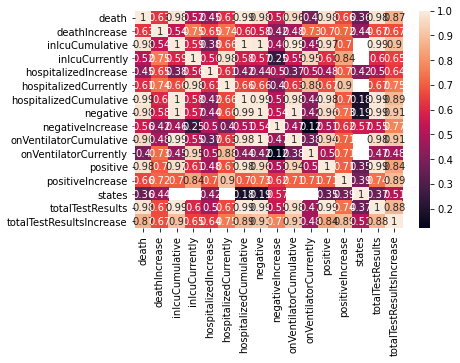

In [8]:
import pandas as pd
import numpy as np
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib.pyplot as plt
import seaborn as sns

np.seterr(divide='ignore', invalid='ignore')
print(np.pi)
nationalHistory = pd.read_csv("national-history.csv")

#see the dataframe shape
print(nationalHistory.shape)

#identify the columns
print(nationalHistory.columns)

print(nationalHistory.head(100))

#Identify the missing data
nationalHistory.info()

#quantitave measures of missing values
print(nationalHistory.isnull().sum())

# seek the correlation
corrMatrix = nationalHistory.corr()
sns.heatmap(corrMatrix, annot=True)
#plt.show()

#target vector
target = 'positive'
y = nationalHistory[target]

#feature matrix
feature = [
    'positive', 'positiveIncrease', 'totalTestResults',
    'totalTestResultsIncrease'
]
x = nationalHistory[feature]

#Train test our X features & Y target
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.5,
                                                  random_state=420)

print("train Shape",x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

#Hello Shiny please consider the positive as target so you can build the model as you want

from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()]*len(y_train)

print('Baseline MAE: ', round(mean_absolute_error(y_train, y_pred), 5))


from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lm = make_pipeline(StandardScaler(), LinearRegression(),)

lm.fit(x_train, y_train)

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor

forestModel = make_pipeline(SelectKBest( k = "all"),
                           StandardScaler(),
                           RandomForestRegressor(n_estimators = 100,
                                                max_depth = 50,
                                                random_state = 77,
                                                n_jobs = -1)
                           )
forestModel.fit(x_train, y_train)


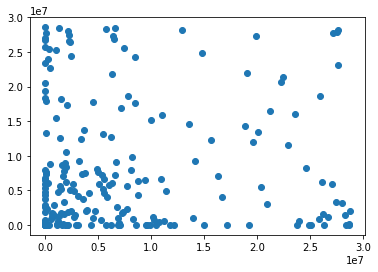

In [59]:
predictions = lm.predict(x_train)
plt.scatter(y_val,predictions)

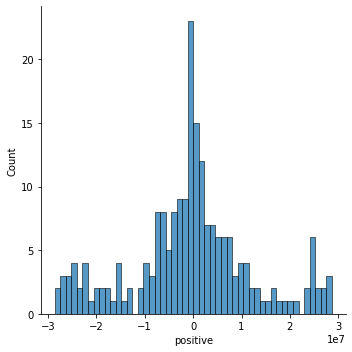

In [48]:
sns.displot((y_val-predictions),bins=50);

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

MAE: 3.1221480596633185e-09
MSE: 1.4076041919354663e-17
RMSE: 3.751805154769456e-09



MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [34]:
from sklearn.linear_model import LogisticRegression
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [35]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Berke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predictions = logmodel.predict(x_train)

In [55]:
from sklearn.metrics import classification_report
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [57]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         5
         9.0       0.00      0.00      0.00         1
        72.0       0.00      0.00      0.00         1
       114.0       0.00      0.00      0.00         1
       307.0       0.00      0.00      0.00         1
       587.0       0.00      0.00      0.00         1
      1061.0       0.00      0.00      0.00         1
      1497.0       0.00      0.00      0.00         1
      1915.0       0.00      0.00      0.00         1
      2592.0       0.00      0.00      0.00         1
      3450.0       0.00      0.00      0.00         1
      4476.0       0.00      0.00      0.00         1
      5738.0       0.00    

C:\Users\Berke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Berke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Berke\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
